In [1]:
import sqlite3
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
inputs_path = Path.cwd().parent / "inputs"

In [3]:
conn = sqlite3.connect(inputs_path / "chinook.sqlite")

In [4]:
cur = conn.cursor()

In [5]:
cur.execute("select * from Artist where name like ?", ["%Rappa%"])

In [6]:
cur.fetchall()

[(36, 'O Rappa')]

In [25]:
query = """
    select ar.Name, count(al.AlbumId) NumAlbums
    from Artist ar
      inner join Album al on ar.ArtistId = al.ArtistId
    group by ar.Name
    order by NumAlbums desc
    limit 10
"""

In [26]:
cur.execute(query)

In [27]:
artists_albums = cur.fetchall()
artists_albums = [{"artist": artist, "amount": amount} for artist, amount in artists_albums]
df_artists_albums = pd.DataFrame(artists_albums)
df_artists_albums

,artist,amount
0,Iron Maiden,21
1,Led Zeppelin,14
2,Deep Purple,11
3,U2,10
4,Metallica,10
5,Ozzy Osbourne,6
6,Pearl Jam,5
7,Various Artists,4
8,Van Halen,4
9,Lost,4


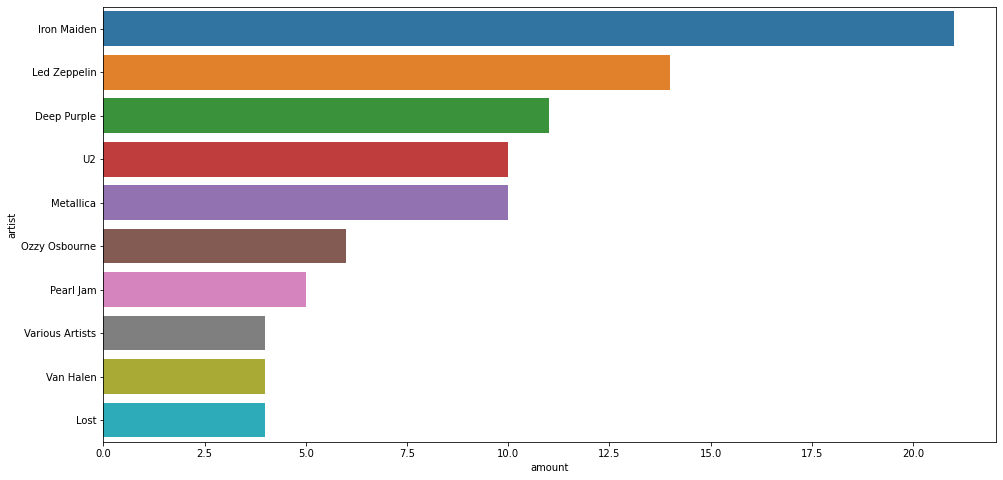

In [28]:
plt.figure(figsize=(16, 8))
sns.barplot(x="amount", y="artist", data=df_artists_albums)
plt.close(2)

In [29]:
conn.close()